In [6]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [13]:
print(f"x_train shape : {x_train.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"x_test shape  : {x_test.shape}")
print(f"y_test shape  : {y_test.shape}")

x_train shape : (60000, 28, 28)
y_train shape : (60000,)
x_test shape  : (10000, 28, 28)
y_test shape  : (10000,)


In [15]:
print("label for first training example: ", y_train[0])
print("---beginning of pattern for first training example---")
for line in x_train[0]:
    for num in line: 
        if num > 0:
            print('*',end=' ')
        else:
            print(' ', end=' ')
    print('')
print('---end of pattern for first training example')


label for first training example:  5
---beginning of pattern for first training example---
                                                        
                                                        
                                                        
                                                        
                                                        
                        * * * * * * * * * * * *         
                * * * * * * * * * * * * * * * *         
              * * * * * * * * * * * * * * * *           
              * * * * * * * * * * *                     
                * * * * * * *   * *                     
                  * * * * *                             
                      * * * *                           
                      * * * *                           
                        * * * * * *                     
                          * * * * * *                   
                            * * * * * *               

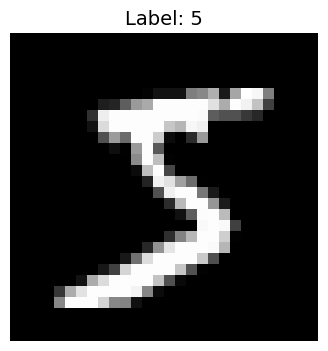

In [ ]:
import matplotlib.pyplot as plt

image = x_train[0]
label = y_train[0]

plt.figure(figsize=(4, 4))
plt.imshow(image, cmap='gray') 
plt.title(f"Label: {label}", fontsize=14)
plt.axis('off') 
plt.show()